# 분포
## 카테고리 분포

베르누이 분포: 동전처럼 0,1인 분포  
카테고리 분포: 확률 분포는 주사위처럼 0,1만을 가지는 변수가 아닌 변수들에 대한 확률 분포

x = {1,2,3,4,5,6}  
x = 1 -> {1,0,0,0,0,0}  
x = 2 -> {0,1,0,0,0,0}  
x = 3 -> {0,0,1,0,0,0}  
x = 4 -> {0,0,0,1,0,0}  
x = 5 -> {0,0,0,0,1,0}  
x = 6 -> {0,0,0,0,0,1}  
=> one hot encoding

$$ \Sigma{x_k} = 1$$
카테고리 분포의 모수는 $μ$ 이며,
$$μ = ({μ_1}, …, {μ_k})$$
$$ 0 < \mu ≤ 1 $$
$$\Sigma{\mu_k} = 1$$

카테고리 확률 분포
$$Cat({x_1},{x_2},…,{x_k},{\mu_1},…,{\mu_k}) = Cat(x:\mu)$$

$$Cat(x:\mu) = {\mu_1}\quad if\quad x = (1,0,0,…0), \quad {\mu_2} \quad if \quad x = (0,1,…,0), …$$

$$Cat(x:\mu) = {\mu_1^{x_1}}{\mu_2^{x_3}}…{\mu_k^{x_k}} = \prod_{k=1}^K{{\mu_k}^{x_k}}$$

카테고리 분포의 기댓값
$$E[{x_k}] = \mu_k$$
카테고리 분포의 분산
$$Var[{x_k}] \mu_k(1-\mu_k)$$

In [6]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import scipy as sp
import scipy.stats
mu = [0.1,0.1,0.1,0.1,0.3,0.3]
rv = scipy.stats.multinomial(1, mu)

In [2]:
import numpy as np
import pandas as pd
xx = np.arange(1, 7)
xx

array([1, 2, 3, 4, 5, 6])

In [3]:
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


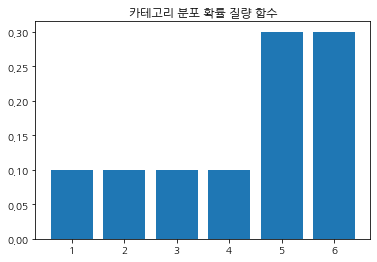

In [7]:
import matplotlib.pyplot as plt
plt.bar(xx, rv.pmf(xx_ohe.values))
plt.title('카테고리 분포 확률 질량 함수')
plt.show()

In [11]:
np.random.seed(0)
X = rv.rvs(1000)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

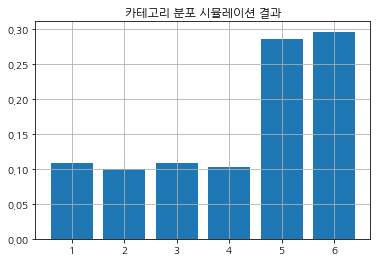

In [12]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,7), y)
plt.title('카테고리 분포 시뮬레이션 결과')
plt.grid()
plt.show()

In [13]:
df = pd.DataFrame({'이론': rv.pmf(xx_ohe.values), '시뮬레이션': y}, index = np.arange(1,7)).stack()

In [16]:
df = df.reset_index()
df.columns = ['표본', '유형', '비율']
df.pivot('표본','유형','비율')
df

,표본,유형,비율
0,1,이론,0.100
1,1,시뮬레이션,0.109
2,2,이론,0.100
3,2,시뮬레이션,0.100
4,3,이론,0.100
5,3,시뮬레이션,0.108
6,4,이론,0.100
7,4,시뮬레이션,0.102
8,5,이론,0.300
9,5,시뮬레이션,0.285


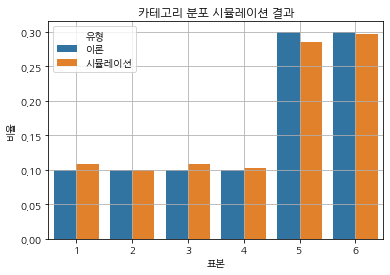

In [17]:
import seaborn as sns
sns.barplot(x='표본', y='비율', hue='유형', data=df)
plt.title('카테고리 분포 시뮬레이션 결과')
plt.grid()
plt.show()

#### 실습
μ = (0.2, 0.2, 0.15, 0.05, 0.2, 0.1, 0.1)
표본이 10개, 1000개 비교

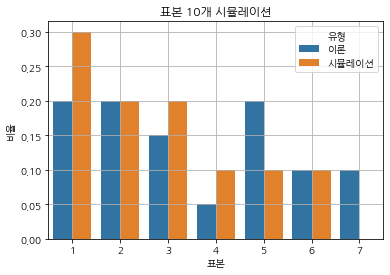

In [50]:
mu = [0.2, 0.2, 0.15, 0.05, 0.2, 0.1, 0.1]
rv = scipy.stats.multinomial(1, mu)

xx = np.arange(1, 8)
xx_ohe = pd.get_dummies(xx)
np.random.seed(0)
X = rv.rvs(10)

y = X.sum(axis=0) / float(len(X))
df = pd.DataFrame({'이론': rv.pmf(xx_ohe.values), '시뮬레이션': y}, index = np.arange(1,8)).stack()
df = df.reset_index()
df.columns = ['표본', '유형', '비율']
df.pivot('표본','유형','비율')

sns.barplot(x='표본', y='비율', hue='유형', data=df)
plt.title('표본 10개 시뮬레이션')
plt.grid()
plt.show()

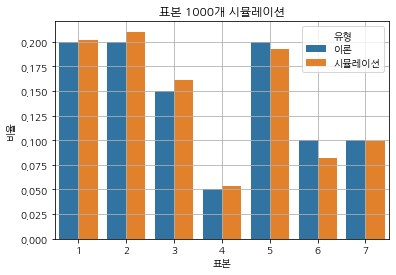

In [51]:
mu = [0.2, 0.2, 0.15, 0.05, 0.2, 0.1, 0.1]
rv = scipy.stats.multinomial(1, mu)

xx = np.arange(1, 8)
xx_ohe = pd.get_dummies(xx)
np.random.seed(0)
X = rv.rvs(1000)

y = X.sum(axis=0) / float(len(X))
df = pd.DataFrame({'이론': rv.pmf(xx_ohe.values), '시뮬레이션': y}, index = np.arange(1,8)).stack()
df = df.reset_index()
df.columns = ['표본', '유형', '비율']
df.pivot('표본','유형','비율')

sns.barplot(x='표본', y='비율', hue='유형', data=df)
plt.title('표본 1000개 시뮬레이션')
plt.grid()
plt.show()

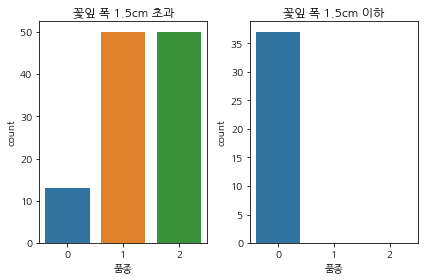

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['품종'] = pd.Series(iris.target, dtype='category')

df1 = df[df['petal length (cm)']> 1.5]
df2 = df[df['petal length (cm)']<= 1.5]

fig, ax = plt.subplots(1,2)
sns.countplot(x='품종', data=df1, ax=ax[0]).set_title('꽃잎 폭 1.5cm 초과')
sns.countplot(x='품종', data=df2, ax=ax[1]).set_title('꽃잎 폭 1.5cm 이하')
plt.tight_layout()
plt.show()

## 다항분포
베르누이를 여러번 실험 -> 이항분포  
카테고리 확률 변수가 여러개 -> 다항분포  
K개인 카테고리 확률변수의 표본을 N개 있을 때, 각각의 카테고리 k가 $x_k$번 나올 확률 분포

- 다항 분포의 확률질량 함수
$$ Μ(x;N,\mu) = \binom N x \prod_{k=1}^K{\mu_k}^{x_k}$$

- 기대값
$$E[{x_k}] = N_{{\mu}_k}$$

- 분산
$$Var[{x_k}]=N{\mu_k}(1-{\mu_k})$$

In [53]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = scipy.stats.multinomial(N, mu)
np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9]])

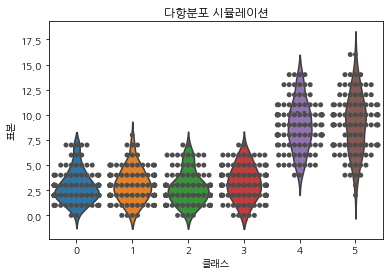

In [55]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ['N', '클래스', '표본']

sns.violinplot(x='클래스', y='표본', data=df, inner='quartile')
sns.swarmplot(x='클래스', y='표본', data=df, color='.3')
plt.title('다항분포 시뮬레이션')
plt.show()

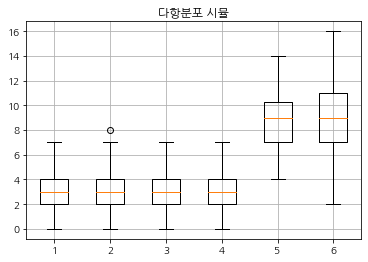

In [56]:
plt.boxplot(X)
plt.title('다항분포 시뮬')
plt.grid()
plt.show()

## 베타 분포
데이터의 분포를 표현하는 분포가 아닌 모수값 추정 시 신뢰도를 표현하는데 사용   
모수 a,b   
표본 공간 0~1 실수
확률 밀도함수
$$Beta(x;a,b)$$

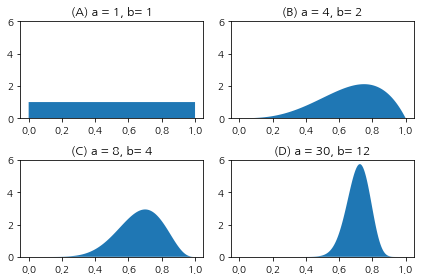

In [57]:
xx = np.linspace(0,1, 1000)
plt.subplot(221)
plt.fill_between(xx, scipy.stats.beta(1,1).pdf(xx))
plt.ylim(0,6)
plt.title('(A) a = 1, b= 1')

plt.subplot(222)
plt.fill_between(xx, scipy.stats.beta(4,2).pdf(xx))
plt.ylim(0,6)
plt.title('(B) a = 4, b= 2')

plt.subplot(223)
plt.fill_between(xx, scipy.stats.beta(8,4).pdf(xx))
plt.ylim(0,6)
plt.title('(C) a = 8, b= 4')

plt.subplot(224)
plt.fill_between(xx, scipy.stats.beta(30,12).pdf(xx))
plt.ylim(0,6)
plt.title('(D) a = 30, b= 12')
plt.tight_layout()
plt.show()

기댓값
$$E[x] = \frac{a}{a+b}$$

최빈값
$$mode = \frac{a-1}{a+b-2}$$

분산
$$Var[x] = \frac{ab}{{(a+b)}^2(a+b+1)}$$

## 감마분포
베타분포와 달리 0 ~ 무한의 표본을 사용

$$Gam(x;a,b)$$

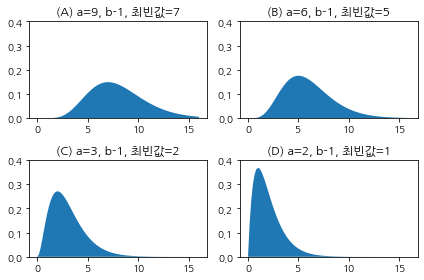

In [58]:
xx = np.linspace(0,16,100)
plt.subplot(221)
plt.fill_between(xx, scipy.stats.gamma(8).pdf(xx))
plt.ylim(0,0.4)
plt.title("(A) a=9, b-1, 최빈값=7")

plt.subplot(222)
plt.fill_between(xx, scipy.stats.gamma(6).pdf(xx))
plt.ylim(0,0.4)
plt.title("(B) a=6, b-1, 최빈값=5")

plt.subplot(223)
plt.fill_between(xx, scipy.stats.gamma(3).pdf(xx))
plt.ylim(0,0.4)
plt.title("(C) a=3, b-1, 최빈값=2")

plt.subplot(224)
plt.fill_between(xx, scipy.stats.gamma(2).pdf(xx))
plt.ylim(0,0.4)
plt.title("(D) a=2, b-1, 최빈값=1")
plt.tight_layout()
plt.show()

- 기대값
$$E[X]=\frac{a}{b}$$
- 최빈값
$$mode=\frac{a-1}{b}$$
- 분산
$$Var[X]=\frac{a}{b^2}$$

## 디리클레 분포
베타분포의 확장  
베타분포는 0 ~ 1을 가지는 단일 확률변수에 대한 분포  
디리클레분포는 0 ~ 1을 가지는 다변수 확률변수  
모수 추정시 베이지안 모형에 사용  
밀도함수
$$Dir(x;a)$$
조건
$$0 ≤ {x_i} ≤ 1,\quad Σ_{i=1}^K{x_i}=1$$
베타분포는 k=2인 디리클레 분포포
